# Bayesian Linear Regression

In [12]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
RANDOM_SEED = 1
rng = np.random.default_rng(RANDOM_SEED)

size = 50
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x

# add noise and generate observations (sample data)
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

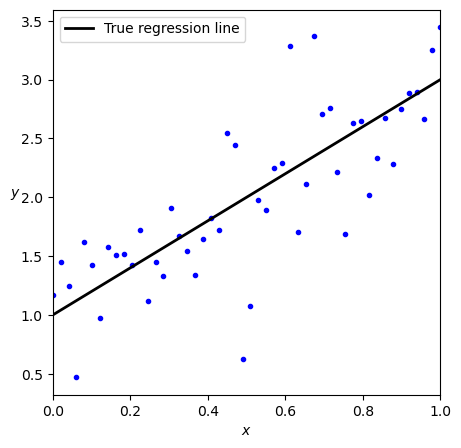

In [28]:

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, xlabel="x", ylabel="y")
plt.plot(x, y, 'b.');

ax.plot(x, true_regression_line, 
        color = 'k',
        label="True regression line", lw=2.0)
plt.legend(loc=0)
plt.xlim(0,1)
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.savefig('Bayesian regression scatter with true regression.svg')


In [7]:
# use pymc3 and create a Bayesian model

basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    intercept = pm.Normal('alpha', mu=0, sigma=20) # b_0
    slope     = pm.Normal('beta', mu=0, sigma=20) # b_1
    sigma     = pm.HalfNormal('sigma', sigma=20) # or pm.HalfCauchy

    mu = intercept + slope*x

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

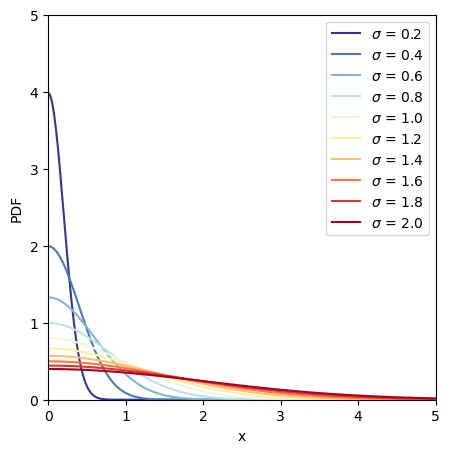

In [37]:
# understand half=normal distribution

import scipy.stats as st
from matplotlib import cm # Colormaps

fig = plt.figure(figsize=(5, 5))
x = np.linspace(0, 5, 200)

sigma_array = np.linspace(0.2,2,10)

colors = plt.cm.RdYlBu_r(np.linspace(0,1,len(sigma_array)))

for i in range(0,len(sigma_array)):
    
    sigma_i = sigma_array[i]
    pdf = st.halfnorm.pdf(x, scale=sigma_i)
    plt.plot(x, pdf, 
             color = colors[int(i)],
             label = r'$\sigma$ = %.1f' %sigma_i)

plt.xlabel('x')
plt.ylabel('PDF')
plt.legend(loc=1)
plt.xlim(0,5)
plt.ylim(0,5)
plt.savefig('Bayesian regression half-normal.svg')
# reference:
# https://www.pymc.io/projects/docs/en/latest/api/distributions/generated/pymc.HalfNormal.html


In [8]:
# simulate

with basic_model:
    # draw 2000 posterior samples from 2 chains
    
    trace = pm.sample(draws=1000, chains=2, tune=200, 
                      discard_tuned_samples=True)


C:\Users\james\AppData\Roaming\Python\Python39\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 114 seconds.
The acceptance probability does not match the target. It is 0.9376717475497341, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9128530203297222, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\james\AppData\Local\Temp\ipykernel_10256\3821371692.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


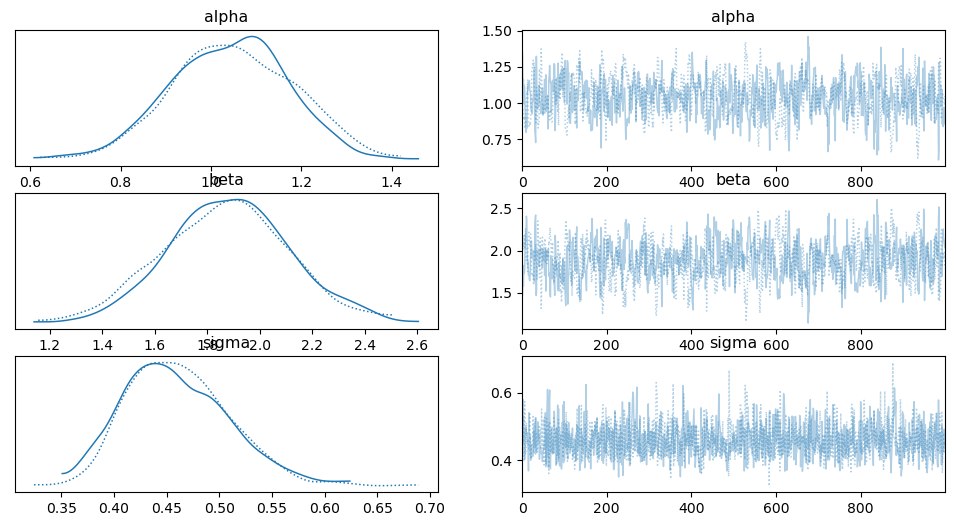

In [10]:
pm.traceplot(trace)
plt.savefig('Bayesian regression traceplot.svg')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


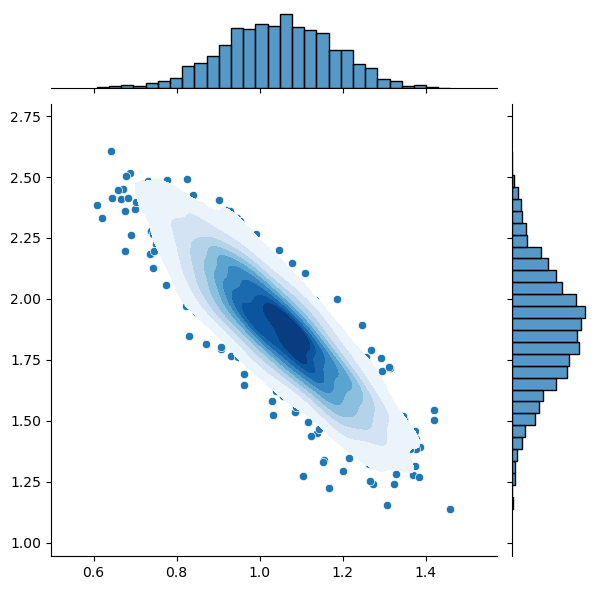

In [27]:
# plot scatter and contour with marginals

import seaborn as sns

# sns.jointplot(trace['alpha'], trace['beta'], kind="kde", cmap="Blues", shade=True)
g = sns.jointplot(trace['alpha'], trace['beta'], ax = ax)
g.plot_joint(sns.kdeplot, color="r", cmap="Blues", shade=True, ax = ax)

plt.xlabel("beta[0]")
plt.ylabel("beta[1]")
plt.savefig('Bayesian regression jointplot.svg')

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


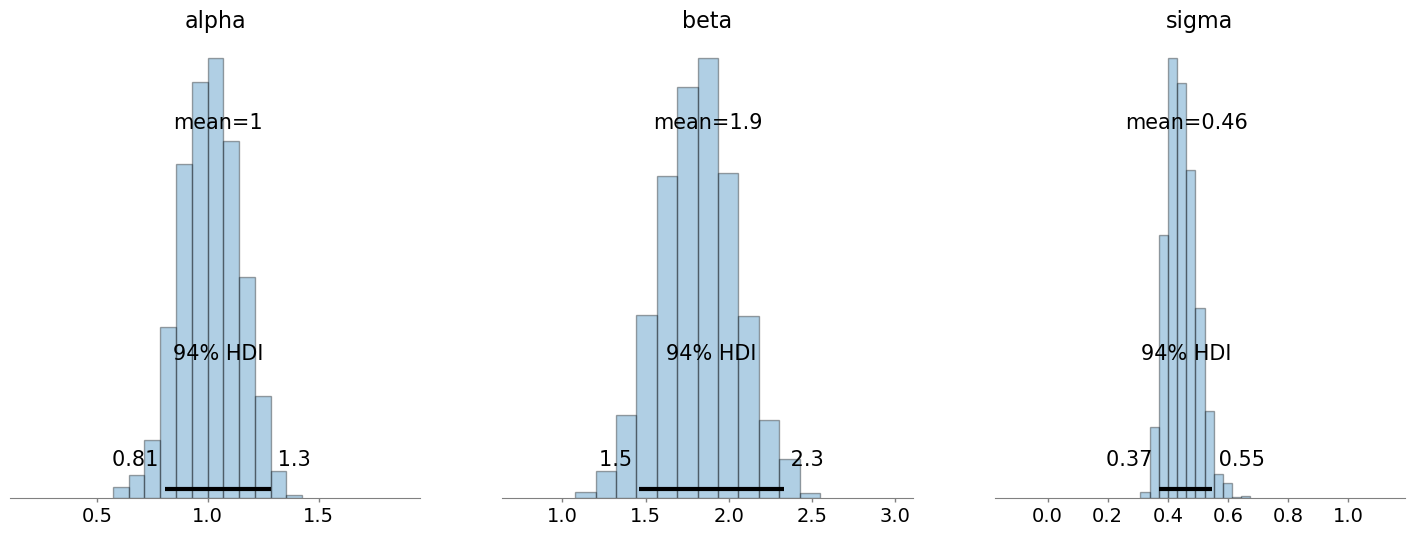

In [14]:
# Posterior hist

ax = pm.plot_posterior(trace, kind="hist",
                       figsize = (18, 6), 
                       edgecolor = 'k');

plt.savefig('Bayesian regression hist.svg')


Got error No model on context stack. trying to find log_likelihood in translation.


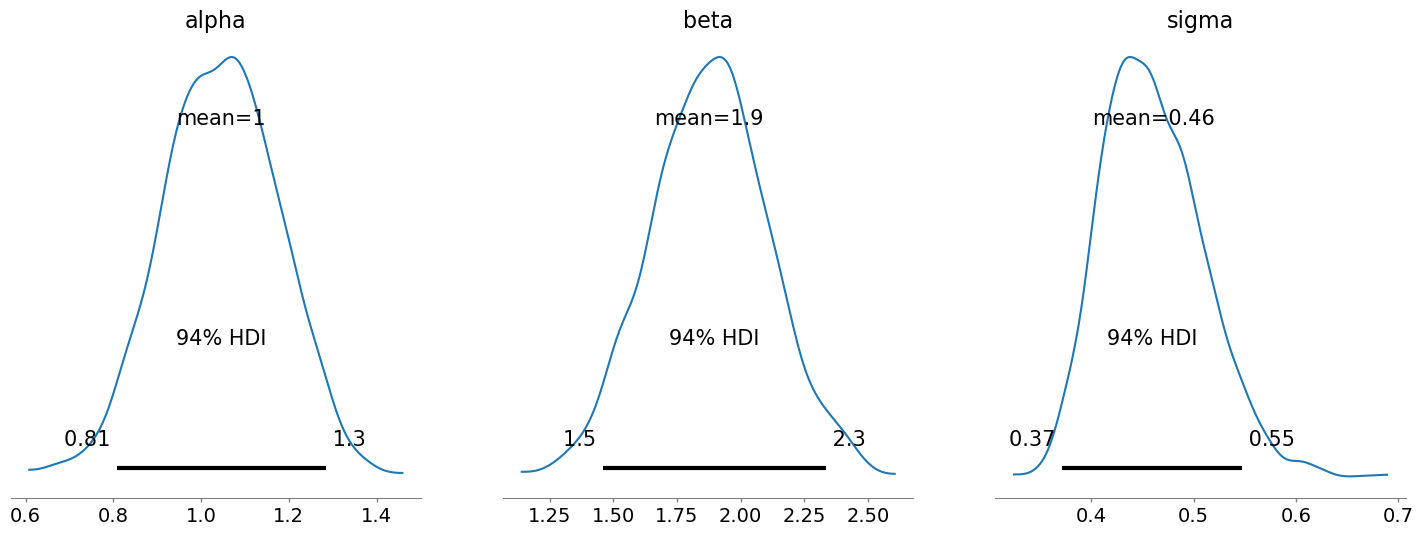

In [15]:
# Posterior KDE
ax = pm.plot_posterior(trace, kind="kde",
                       figsize = (18, 6));

plt.savefig('Bayesian regression KDE.svg')

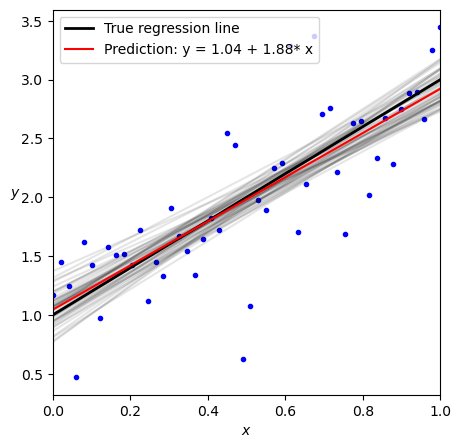

In [26]:

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(x, y, 'b.');

idx_array = range(0, len(trace['alpha']), 40)
alpha_m = trace['alpha'].mean()
beta_m = trace['beta'].mean()

for idx in idx_array:
    plt.plot(x, trace['alpha'][idx] + trace['beta'][idx] *x, c='k', alpha = 0.1);

ax.plot(x, true_regression_line, 
    color = 'k',
    label="True regression line", lw=2.0)

plt.plot(x, alpha_m + beta_m * x, c='r', 
         label='Prediction: y = {:.2f} + {:.2f}* x'.format(alpha_m, beta_m))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc=2)
plt.xlim(0,1)

plt.savefig('Bayesian regression prediction.svg')